In [2]:
import numpy as np
import scipy.sparse
import matplotlib.pyplot as plt

import math

In [6]:
test_a = scipy.sparse.csc_matrix((100, 3))

test_b = test_a[:, [False, False, False]]
print(type(test_b))

<class 'scipy.sparse.csc.csc_matrix'>


In [4]:
test_a = scipy.sparse.csc_matrix((512*512, 0))

for k in range(10):
    test_b = scipy.sparse.csc_matrix((512*512, 0))
    test_a = scipy.sparse.hstack([test_a, test_b])
    
print(test_a.shape)

(262144, 0)


In [17]:
test_1 = np.random.rand(50, 60)
test_2 = test_1.reshape((50, 60), order = "F")

print(np.linalg.norm(test_1 - test_2))

0.0


5


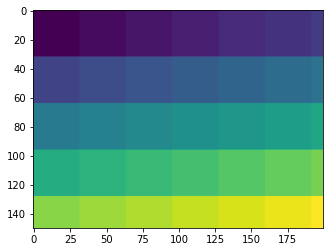

(30000, 5)
<class 'scipy.sparse.csc.csc_matrix'>
[  239  1702  1946  2674  4453  4603  9894 13876 14155 15775 25870 25959]
[ 4  6  8 10 15 17 20 22 29 31]
<class 'scipy.sparse.csc.csc_matrix'>
[ 2107  3123  4147  9020  9044  9859 11071 13138 21530 22320 23789 24664
 28935 29925]
[ 1  2  9 17 19 20 21 22 24 26 35]
<class 'scipy.sparse.csc.csc_matrix'>
[  744   764  2152  3865  4026  4901  9703 12866 18045 19525 19544 20801
 21342 23191 23943 25203 29133 29287]
[ 1  5  6  8 11 12 14 19 22 23 24 26 29]
<class 'scipy.sparse.csc.csc_matrix'>
[  928  1462  2599  2779  5237  6968  6986  9433 10704 11086 13199 13542
 15586 16978 17606 25899 28782]
[ 1  4  8 10 11 15 16 22 27 30 31 32 34]
<class 'scipy.sparse.csc.csc_matrix'>
[ 7350  8236  9732 10082 14850 15132 18072 18870 19072 21793 27038 27349
 27767 29887]
[ 2  4  6 10 12 13 14 18 25 30 31 32]


In [41]:
x = 150
y = 200
property_count = 0
block_size = (32,32)
iters1 = math.ceil(x / block_size[0])
print(iters1)
iters2 = math.ceil(y / block_size[1])
properties = np.zeros((x,y))
num_masks = 5
neuron_properties = np.zeros((iters1*iters2, num_masks)) 


for k in range(iters1):
    for j in range(iters2):
        x_range = (block_size[0] * k, block_size[0] * (k+1))
        y_range = (block_size[1] * j, block_size[1] * (j+1))

        properties[x_range[0]:x_range[1], y_range[0]:y_range[1]] = property_count
        property_count +=1 
            
properties_r = properties.reshape((-1, 1), order="F")  

plt.figure()
plt.imshow(properties_r.reshape((x, y), order="F"))
plt.show()

rand_mat = scipy.sparse.random(x*y, num_masks, 0.0005, dtype='bool')

prod = rand_mat.tocsr().multiply(properties_r)
prod = prod.tocsc()
print(prod.shape)
for k in range(prod.shape[1]):
    curr_col = prod[:, k]
    print(type(curr_col))
    row_nonzero, _ = curr_col.nonzero()
    print(row_nonzero)
    property_values = np.unique(properties_r[row_nonzero, :]).astype('int')
    print(property_values)
    neuron_properties[property_values, k] = 1

In [3]:
a_test = scipy.sparse.random(50, 4, 0.01)

In [13]:
a_test_csc = a_test.tocsc()
a_sq = a_test_csc.multiply(a_test_csc)
a_norm_sq = np.asarray(a_sq.sum(0))
a_norm = np.sqrt(a_norm_sq)

a_np_norm = np.linalg.norm(a_test.toarray(), axis= 0)

print(a_norm)
print(a_np_norm)

print(a_norm.shape)
print(a_np_norm.shape)

a_norm[a_norm == 0] = 1 #Deal with invalid values
a_np_norm[a_np_norm==0] = 1

a_norm_divisor = np.reciprocal(a_norm)

a_test_normalized = a_test.multiply(a_norm_divisor)

a_np_normalized = a_test.toarray() / a_np_norm[None, :]


print(np.linalg.norm(a_test_normalized.toarray() - a_np_normalized))

[[0.         0.43425441 0.         0.        ]]
[0.         0.43425441 0.         0.        ]
(1, 4)
(4,)
0.0


In [14]:
a_test = scipy.sparse.random(50, 3, 0.01).tocsr()

a_prod = a_test.multiply(np.ones((50, 1)))
print(type(a_prod))

<class 'scipy.sparse.coo.coo_matrix'>


In [2]:
def matmul_fn(A, B):
    A.dot(B)
    return 1
    

In [3]:
400/(512*512)


0.00152587890625

In [5]:
d1 = 300
d2 = 100000


A = scipy.sparse.random(d1, d2, density=0.001, format='csc')
At = A.T
print("now at matmul")
print(type(At))
%timeit matmul_fn(At, A)
%memit matmul_fn(At, A)


now at matmul
<class 'scipy.sparse.csr.csr_matrix'>
45.8 ms ± 38.8 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
peak memory: 121.00 MiB, increment: 0.01 MiB


In [8]:
elt = scipy.sparse.csc_matrix((512*512, 1))

masks = scipy.sparse.csc_matrix((512*512, 800))

for k in range(masks.shape[1]):
    add = masks[:, k]
    elt = scipy.sparse.hstack([elt, add])
print(elt.shape)
print(type(add.T))


(262144, 801)
<class 'scipy.sparse.csr.csr_matrix'>


In [12]:
elt = scipy.sparse.csc_matrix((512*512, 1))

masks = scipy.sparse.csc_matrix((512*512, 800))
prod = elt.T.dot(masks)

print(type(prod))
print(prod.shape)
print(prod.max())

<class 'scipy.sparse.csr.csr_matrix'>
(1, 800)
0.0
